<a href="https://colab.research.google.com/github/nnttluna/genomic-data-science/blob/main/sequencing_naive_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
seq = 'ACGT'
seq[1]

'C'

In [2]:
e =''
len(e)

0

In [3]:
seq1 = 'CCAA'
seq2 = 'GGTT'
seqs = ['A','C','G','T']
print(' '.join(seqs))

A C G T


In [4]:
import random
random.seed(7)
random.choices('AGCT')


['G']

In [5]:
seq =''
for _ in range(10):
  seq+=random.choice('AGCT')
print (seq)

GTAAACAGAA


In [6]:
seq = ''.join([random.choice('AGCT') for _ in range (10)])
print (seq)

TTAGATAAGA


In [7]:
seq[1:3]

'TA'

In [8]:
seq[:3]

'TTA'

In [9]:
seq[-3:]

'AGA'

In [10]:
def longestCommonPrefix(s1,s2):
  i = 0
  while i < len(s1) and i < len(s2) and s1[i] == s2[i]:
    i+=1
  return s1[:i]

longestCommonPrefix('ACCATGT','ACCAGAC')

'ACCA'

In [11]:
def match(s1,s2):
  if not len(s1)==len(s2):
    return False

  for i in range (len(s1)):
    if not s1[i] == s2[i]:
      return False

  return True

match('ATGCT', 'ATGCA')

False

In [12]:
'ATGCT'=='ATGCT'

True

In [13]:
def reverseComplement(s):
  complement = {'A':'T','C':'G','G':'C','T':'A', 'N':'N', 'a':'t', 't':'a', 'c':'g', 'g':'c', 'n':'n' }
  t =''
  for base in s:
    t = complement[base] + t
  return t

reverseComplement('CGCTAAG')

'CTTAGCG'

In [14]:
import urllib.request


url = 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa'
filename = 'lambda_virus.fa'
urllib.request.urlretrieve(url, filename)

('lambda_virus.fa', <http.client.HTTPMessage at 0x793b5c820850>)

In [15]:
def readgenome(filename):
  genome =''
  with open(filename,'r') as f:
    for line in f:
      if not line[0] =='>':
        genome+=line.rstrip()
  return genome



In [16]:
genome = readgenome(filename)
genome[:100]

'GGGCGGCGACCTCGCGGGTTTTCGCTATTTATGAAAATTTTCCGGTTTAAGGCGTTTCCGTTCTTCTTCGTCATAACTTAATGTTTTTATTTAAAATACC'

In [17]:
len(genome)

48502

In [18]:
counts = {'A':0,'G':0,'C':0,'T':0,}
for base in genome:
  counts[base] +=1
print(counts)

{'A': 12334, 'G': 12820, 'C': 11362, 'T': 11986}


In [19]:
import collections
collections.Counter(genome)

Counter({'G': 12820, 'C': 11362, 'A': 12334, 'T': 11986})

In [20]:
def QtoPhred33 (Q):
  # Q to Phred+33 ASCII
  return chr(Q+33)

def phred33toQ (qual):
  return ord(qual) -33

In [21]:
url = 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq'
filename2 = 'dna_seq.fa'
urllib.request.urlretrieve(url, filename2)

('dna_seq.fa', <http.client.HTTPMessage at 0x793b5c8786d0>)

In [22]:
def readfastq(filename):
  sequences =[]
  qualities =[]
  with open(filename) as fh:
    while True:
      fh.readline()
      seq = fh.readline().rstrip()
      fh.readline()
      qual = fh.readline().rstrip()
      if len(seq) == 0:
        break
      sequences.append(seq)
      qualities.append(qual)
  return sequences, qualities


In [23]:
seqs, quals = readfastq('dna_seq.fa')
print(seqs[:5])
print(quals[:5])

['TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTCACCCTAACCCTAACCCTAACCGTATCCGTCACCCTAACCCTAAC', 'TAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACC', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGG', 'TAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAGGGTTAAGGGTTGGGGGTTAGGGGTAGGGGTAGGGTTA', 'CTAACCCTAACCCTAACCCTAACCCTACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCTAACCCAACCCTAACCCTAACCCTCACC']
['???B1ADDD8??BB+C?B+:AA883CEE8?C3@DDD3)?D2;DC?8?=BAD=@C@(.6.6=A?=?@##################################', 'CCCFFFFFGHHGHJJJJJIJGIIJJJJJJJIJIJJJJJFJJFGIIIIH=CBFCF=CCEG)=>EHB2@@DEC>;;?=;(=?BBD?59?BA###########', '@@<DD?DDHHH<CBHII:CFGIGAGHIIG?CCGGE0BDHIIHIGICH8=FHGI=@EHGGGEEHH>);?CC@.;(=;?59,5<A599?CB>ABBCB><88A', '@CCFFDDFHHHDFHIJJCGGIJJHIIHJC?DHHIJ0?DGHI9BBFHICGGIGI=CDEGI=?AAEF7@?################################', '@<@FDFDDBBFHH@EBGGGEH@FFHE;EHIEGGBHG?)9?8BDGGBGGBCDGI=93=C6==

In [24]:
phred33toQ('J')

41

In [25]:
def createHist(qualities):
  hist = [0] * 50
  for qual in qualities:
    for phred in qual:
      q = phred33toQ(phred)
      hist[q] +=1
  return hist


In [26]:
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


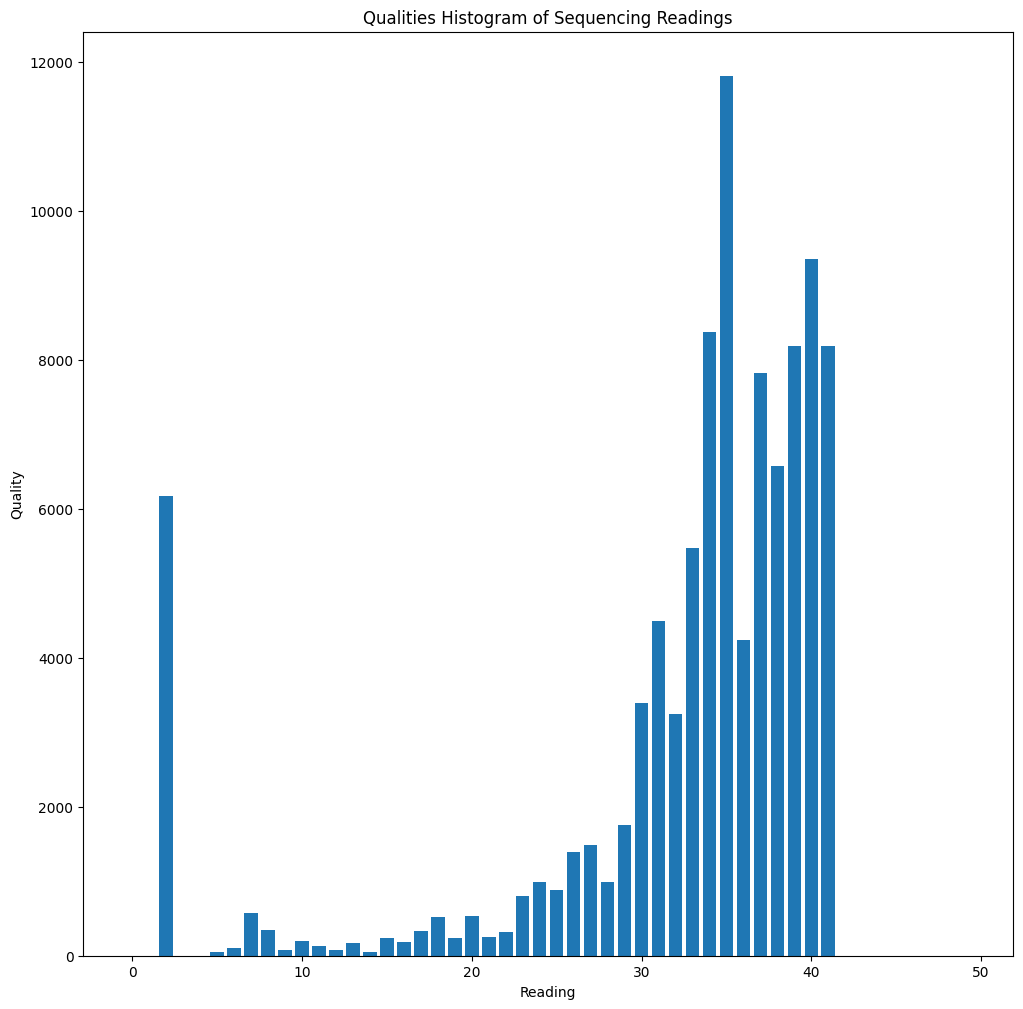

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plt.bar(range(len(h)),h)
# setting title name
plt.title("Qualities Histogram of Sequencing Readings")

# setting x axis label
plt.xlabel("Reading")

# setting y axis label
plt.ylabel("Quality")
plt.show()

In [28]:
def findGCbypos(reads):
  gc = [0] * 100
  total = [0] * 100

  for read in reads:
    for i in range(len(read)):
      if read[i] =='C' or read[i] =='G':
        gc[i] +=1
      total[i] +=1
  for i in range (len(gc)):
    if total[i] > 0:
      gc[i] /=float(total[i])

  return gc

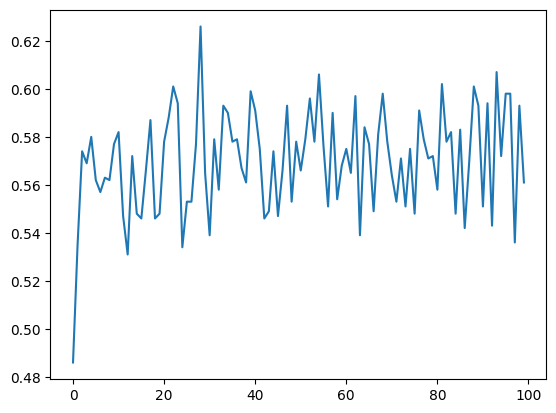

In [29]:
gc = findGCbypos(seqs)
plt.plot(range(len(gc)),gc)
plt.show()

In [30]:
count = collections.Counter()
for seq in seqs:
  count.update(seq)
print(count)

Counter({'G': 28742, 'C': 28272, 'T': 21836, 'A': 21132, 'N': 18})


In [31]:
def naive(p,t):
  occurances = []
  for i in range(len(t)-len(p)+1):
    match_ques =True
    for j in range (len(p)):
      if not t[i+j] == p[j]:
        match_ques = False
        break
    if match_ques:
      occurances.append(i)
  return occurances

In [32]:
t = 'AGCTTGTTAGCGATATCGT'
p = 'AG'
naive (p,t)

[0, 8]

In [33]:
def generateReads (genome,numReads,readLen):
  reads =[]
  for _ in range (numReads):
    start = random.randint(0,len(genome)-readLen) - 1
    reads.append(genome[start:start+readLen])
  return reads

In [34]:
reads = generateReads(genome,100,100)

numMatched = 0
for r in reads:
  matches = naive(r,genome)
  if len(matches)>0:
    numMatched+=1
print(numMatched,'/',len(reads), ' reads matched exactly', )

100 / 100  reads matched exactly


In [35]:

url3 = 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR266411_1.first1000.fastq'
filename3 = 'real_reads.fa'
urllib.request.urlretrieve(url3, filename3)

url4 = 'http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/phix.fa'
filename4 = 'phix.fa'
urllib.request.urlretrieve(url4, filename4)

('phix.fa', <http.client.HTTPMessage at 0x793b5c28af80>)

In [36]:
phix_reads, _ = readfastq('real_reads.fa')
genome = readgenome(filename4)

In [37]:
numMatched = 0
n= 0
for r in phix_reads:
  r = r[:30]
  matches = naive(r,genome)
  n+=1
  if len(matches) > 0:
    numMatched+=1

print(numMatched,'/',n, ' reads matched exactly', )

459 / 1000  reads matched exactly


In [38]:
umMatched = 0
n= 0
for r in phix_reads:
  #r = r[:30]
  matches = naive(r,genome)
  matches.extend(naive(reverseComplement(r),genome))
  n+=1
  if len(matches) > 0:
    numMatched+=1

print(numMatched,'/',n, ' reads matched exactly', )

908 / 1000  reads matched exactly
